<a href="https://colab.research.google.com/github/Jayameena832/Is-the-road-safe-Project/blob/main/Is_the_road_safe(task3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install -q kaggle

In [66]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jojospace","key":"dc55d1d2a0684d06fdc3c8449a0cd0f6"}'}

In [67]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [68]:
! cp kaggle.json ~/.kaggle/

In [69]:
! chmod 600 ~/.kaggle/kaggle.json

In [70]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          10407        315  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           5832        180  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            885         44  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [71]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip chest-xray-pneumonia.zip

In [74]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [75]:
import keras

In [76]:
import glob

In [77]:
train_files=glob.glob("/content/chest_xray/train/*/**")

In [78]:
len(train_files)

5216

In [31]:
train_files

['/content/chest_xray/train/PNEUMONIA/person342_virus_702.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1033_bacteria_2966.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person41_bacteria_206.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person518_virus_1036.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person442_virus_902.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person37_bacteria_187.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1559_bacteria_4067.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person19_bacteria_63.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1326_bacteria_3372.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person72_bacteria_354.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person512_virus_1029.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1938_bacteria_4854.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1712_bacteria_4529.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person348_bacteria_1601.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1227_bac

In [32]:
from random import shuffle
shuffle(train_files)
train_files

['/content/chest_xray/train/PNEUMONIA/person9_bacteria_39.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1318_bacteria_3334.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1737_bacteria_4573.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0361-0001.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person290_bacteria_1372.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person278_virus_572.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person393_virus_784.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person413_bacteria_1828.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0497-0001.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person436_bacteria_1883.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person326_bacteria_1506.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1636_bacteria_4337.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person360_bacteria_1647.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1176_bacteria_3123.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person847_virus_1492.jpeg',
 '/c

In [79]:
train_files[4]

'/content/chest_xray/train/PNEUMONIA/person442_virus_902.jpeg'

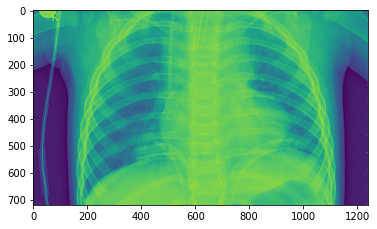

In [80]:
from PIL import Image
img=Image.open(train_files[5])
plt.imshow(img)

In [81]:
np.array(img).shape

(720, 1240)

In [82]:
train_files[0][-4]

'j'

In [83]:
b = (128,128)

In [84]:
import cv2

In [85]:
image = cv2.imread(train_files[5],cv2.IMREAD_GRAYSCALE)
img1 = np.array(img)
re = cv2.resize(img1,b)

In [86]:
re.shape

(128, 128)

In [87]:
X_train=np.zeros((len(train_files),128,128))
Y_train=np.zeros((len(train_files),1))
for i, fi in enumerate(train_files):
    image = cv2.imread(fi,cv2.IMREAD_GRAYSCALE)
    img1 = np.array(img)
    re = cv2.resize(img1,b)
    X_train[i,:,:]=re
    Y_train[i]=   fi[-6]

In [45]:
X_train[0]

array([[  6.,   2.,   0., ...,  20.,  32.,  78.],
       [  1.,   0.,   0., ...,  10., 119.,  41.],
       [  1.,   0.,  12., ...,  30.,  86., 154.],
       ...,
       [ 17.,  17.,  17., ...,  24.,  28.,  53.],
       [ 17.,  18.,  17., ...,  24.,  28.,  53.],
       [ 17.,  17.,  17., ...,  24.,  27.,  52.]])

In [46]:
train_files[0]

'/content/chest_xray/train/PNEUMONIA/person9_bacteria_39.jpeg'

In [44]:
Y_train

array([[ 8.],
       [ 3.],
       [ 2.],
       ...,
       [ 0.],
       [-1.],
       [ 0.]])

In [47]:
X_train/255.0

array([[[0.02352941, 0.00784314, 0.        , ..., 0.07843137,
         0.1254902 , 0.30588235],
        [0.00392157, 0.        , 0.        , ..., 0.03921569,
         0.46666667, 0.16078431],
        [0.00392157, 0.        , 0.04705882, ..., 0.11764706,
         0.3372549 , 0.60392157],
        ...,
        [0.06666667, 0.06666667, 0.06666667, ..., 0.09411765,
         0.10980392, 0.20784314],
        [0.06666667, 0.07058824, 0.06666667, ..., 0.09411765,
         0.10980392, 0.20784314],
        [0.06666667, 0.06666667, 0.06666667, ..., 0.09411765,
         0.10588235, 0.20392157]],

       [[0.02352941, 0.00784314, 0.        , ..., 0.07843137,
         0.1254902 , 0.30588235],
        [0.00392157, 0.        , 0.        , ..., 0.03921569,
         0.46666667, 0.16078431],
        [0.00392157, 0.        , 0.04705882, ..., 0.11764706,
         0.3372549 , 0.60392157],
        ...,
        [0.06666667, 0.06666667, 0.06666667, ..., 0.09411765,
         0.10980392, 0.20784314],
        [0.0

In [55]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [57]:
model = keras.Sequential() 
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128, 128, 1)))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)      

In [61]:
X_train = X_train.reshape(len(X_train),128,128,1)
Y_train.shape

(5216, 1)

In [62]:
X_train.shape

(5216, 128, 128, 1)

In [63]:
Y_train/255.0

array([[ 0.03137255],
       [ 0.01176471],
       [ 0.00784314],
       ...,
       [ 0.        ],
       [-0.00392157],
       [ 0.        ]])

In [64]:
model.fit(X_train, Y_train/255,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 94s 629ms/step - loss: 0.0165 - accuracy: 0.3202 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 2/2
147/147 [==============================] - 93s 630ms/step - loss: 0.0000e+00 - accuracy: 0.3215 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
